In `PS2_Query_Data.ipynb` the data is generated and saved. The resulting file is named `PS2_Data.txt`. Now the data can be processed.

In [3]:
data_file=open('PS2_Data.txt','r')
raw_data=data_file.readlines()
data_file.close()
datefreq={}
for line in raw_data:
    parts=line.split(' ')
    datefreq[parts[0]]=int(parts[1])

We organize the data by months and plot it. 

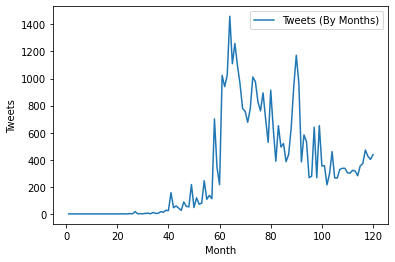

In [8]:
import matplotlib.pyplot as plt
months=[]
for y in ('2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'):
    for m in ('01','02','03','04','05','06','07','08','09','10','11','12'):months.append(y+'-'+m)
x=list(range(1,121))
corr={}
y=[0]*120
for i in range(120):corr[months[i]]=i
for key in datefreq.keys():y[corr[key[:7]]]+=datefreq[key]
plt.plot(x,y,label='Tweets (By Months)')
plt.xlabel('Month')
plt.ylabel('Tweets')
plt.legend()
plt.show()

In the following graph, the blue line shows the number of tweets organized by days and the orange line shows the smoothed number, calculated by taking the average of 7 consecutive days (considering that weekly fluctuations are common), centered at the day plotted.

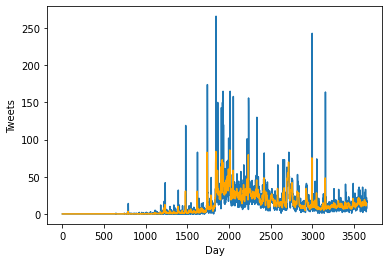

In [9]:
yrs=('2013','2014','2015','2016','2017','2018','2019','2020','2021','2022')
mos=('01','02','03','04','05','06','07','08','09','10','11','12')
days=('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28')
alldates={}
day=[]
for yr in yrs:
    for mo in mos:
        for da in days:day.append(yr+'-'+mo+'-'+da)
        if mo=='02':
            if not int(yr)%4:day.append(yr+'-'+mo+'-29')
        else:
            day.append(yr+'-'+mo+'-29')
            day.append(yr+'-'+mo+'-30')
            if mo in ('01','03','05','07','08','10','12'):day.append(yr+'-'+mo+'-31')
x0=list(range(1,1+len(day)))
y0=[0]*len(day)
for i in range(len(day)):alldates[day[i]]=i
for key in datefreq.keys():y0[alldates[key[:10]]]+=datefreq[key]
plt.plot(x0,y0,label='Tweets (By Days)')
plt.xlabel('Day')
plt.ylabel('Tweets')
for i in range(3,len(y0)-3):y0[i]=sum(y0[i-3:i+4])/7
y0=y0[3:-3]
x0=list(range(1,1+len(y0)))
plt.plot(x0,y0,color='orange',label='Tweets (Smoothed)')
plt.xlabel('Day')
plt.ylabel('Tweets')
plt.show()